<a href="https://colab.research.google.com/github/avisinghal6/Label-Propagation-in-Graph/blob/main/Label_Propagation_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

I am given a labeled dataset and now I have to decide which nodes to pick as the labeled nodes and then run label propagation algorithm using the selected nodes as the initial point. The number of nodes to be selected is the hyperparameter/constraint that is placed externally. 

The algorithm that I am proposing is that we will use spectral clustering on the dataset, the number of clusters for spectral clustering will be determined by the number of classes. For spectral clustering, i will be using only the topological information i.e the adjacency matrix. The output of spectral clustering will segregate the nodes into distinct classes, for each nodes in a class, i will calculate the degree and then within each class i will sort the nodes in descending order of the degree. The I will select "R/C" nodes from each class, here "C" is the number of classes, and for these nodes i will assign the true label. So in total "R" nodes will be selected. For comparing with random selection, i will select "R" nodes randomly and run label propagation. I have compared the results using F1,PRECISION, RECALL, ACCURACY on the karate dataset.

In [3]:
G2=nx.Graph() 

In [4]:
for i in range(0,34):
  G2.add_node(i)

In [5]:
with open('edges.txt') as f:
  for line in f.readlines():
    l=line.split(',')
    G2.add_edge(int(l[0])-1,int(l[1])-1)

In [6]:
true_labels=np.zeros(34)
with open('labels.txt') as f:
  for line in f.readlines():
    l=line.split(',')
    if(int(l[1])==1):
      true_labels[int(l[0])-1]=1
    else:
      true_labels[int(l[0])-1]=-1

In [7]:
A=nx.adjacency_matrix(G2).todense()
A=np.array(A)

In [8]:
clustering = SpectralClustering(n_clusters=2,assign_labels='kmeans',random_state=0,affinity='precomputed').fit(A)

In [9]:
labels=clustering.labels_

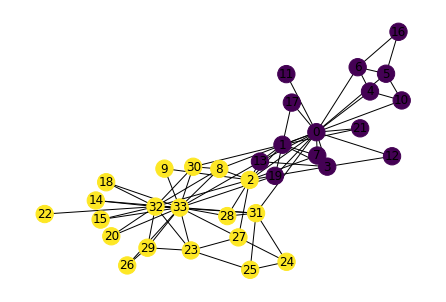

In [10]:
pos = nx.spring_layout(G2)
nx.draw(G2, pos=pos,with_labels=True, node_color=clustering.labels_)

In [11]:
class0={}
class1={}
for i in range(G2.number_of_nodes()):
  if labels[i]==0:
    class0[i]=G2.degree[i]
  else:
    class1[i]=G2.degree[i]

In [12]:
class0=sorted(class0.items(), key=lambda x:x[1],reverse=True)
class1=sorted(class1.items(), key=lambda x:x[1],reverse=True)


In [13]:
def create_Avi_labels(k):
  labels={}

  for i in range(0,k):
    x,y=class0[i]
    labels[x]=true_labels[x]

  for i in range(0,k):
    x,y=class1[i]
    labels[x]=true_labels[x]
  return labels


In [14]:
def create_random_labels(k):
  labels={}
  for i in range(0,k):
    x=random.randint(0, len(true_labels)-1)
    labels[x]=true_labels[x]
  return labels



In [15]:
def label_propagation(G, labels, n_iter=200):
    y = np.zeros((G.number_of_nodes(),1))
    idx = []

    i = 0
    for v in G.nodes():
        if v in labels:
            y[i,0] = labels[v]
            idx.append(i)
        i = i + 1
        
    y0 = y.copy()    
    P = nx.google_matrix(G, alpha=1.)
    
    idx = np.array(idx, dtype=int)
        
    for i in range(n_iter):
        y = P @ y
        y[idx,:] = y0[idx]
        
    y[y >= 0] = 1
    y[y < 0] = -1
        
    pred = np.zeros((G.number_of_nodes()))
    
    i = 0
    for v in G.nodes():
        pred[v] = int(y[i])
        i = i + 1
    
    return pred

Choosing "R"=6 and comparing my algo to random. My algorithm gives higher accuracy, higher f1 score, and this behavior is repetitive, i tried running the random case multiple times.

In [16]:
pred=label_propagation(G2,create_Avi_labels(3))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.9411764705882353, f1score= 0.9411764705882353, precision=0.9411764705882353, recall=0.9411764705882353


In [26]:
pred=label_propagation(G2,create_random_labels(6))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.5882352941176471, f1score= 0.7083333333333333, precision=0.5483870967741935, recall=1.0


Choosing "R"=4 and comparing my algo to random.  My algorithm gives higher accuracy, higher f1 score, and this behavior is repetitive, i tried running the random case multiple times.

In [29]:
pred=label_propagation(G2,create_Avi_labels(2))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.9705882352941176, f1score= 0.9696969696969697, precision=1.0, recall=0.9411764705882353


In [30]:
pred=label_propagation(G2,create_random_labels(4))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.6764705882352942, f1score= 0.7555555555555554, precision=0.6071428571428571, recall=1.0


Choosing "R"=2 and comparing my algo to random.  My algorithm gives higher accuracy, higher f1 score, and this behavior is repetitive, i tried running the random case multiple times.


In [20]:
pred=label_propagation(G2,create_Avi_labels(1))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.9705882352941176, f1score= 0.9696969696969697, precision=1.0, recall=0.9411764705882353


In [31]:
pred=label_propagation(G2,create_random_labels(2))
f1score=f1_score(true_labels,pred)
accscore=accuracy_score(true_labels,pred)
precisionscore=precision_score(true_labels,pred)
recallscore=recall_score(true_labels,pred)
print(f'accuracy= {accscore}, f1score= {f1score}, precision={precisionscore}, recall={recallscore}')

accuracy= 0.5588235294117647, f1score= 0.6938775510204082, precision=0.53125, recall=1.0
